<small><font style="font-size:6pt"> <i>
All of these python notebooks are available at https://gitlab.erc.monash.edu.au/andrease/Python4Maths.git </i>
</font></small>

## Scientific Python

Scientific python refers to a large collection of libraries that can be used with python for a range of numerical and scientific computing tasks. Most of these already come with the Anaconda distribution, but if you have only installed the basic python distribution you may need to add the additional libraries (see [scipy](https://www.scipy.org/)).

Here we just scratch the surface of what is available. This should be enough to get you started with some of the most commonly used modules, but for any specific project that you have, it is worth doing some searching online to see what is already availalbe as part of the this ecosystem.

### Matrices
Dealing with vectors and matrices efficiently requires the **numpy** library. For the sake of brevity we will import this with a shorter name:

In [1]:
import numpy as np

The numpy supports arrays and matrices with many of the features that would be familiar to matlab users. See here quick summary of [numpy for matlab users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html).

Appart from the convenience, the numpy methods are also much faster at performing operations on matrices or arrays than performing arithmetic with numbers stored in lists. 


In [2]:
x = np.array([1,2,3,4,5])
y = np.array([2*i for i in x])
x+y # element wise addition

array([ 3,  6,  9, 12, 15])

In [3]:
X = x[:4].reshape(2,2) # turn into a matrix/table
2*X # multiply by a scalar

array([[2, 4],
       [6, 8]])

However watch out: array is not quite a matrix. For proper matrix operations you need to use the matrix type. Unlike **array**s that can have any number of dimensions, matrices are limited to 2 dimension. However matrix multiplication does what you would expect from a linear algebra point of view, rather than an element-wise multiplication:

In [4]:
Y = np.matrix(X)
print("X=Y=\n",Y)
print("array X*X=\n",X*X,'\nmatrix Y*Y=\n',Y*Y)

X=Y=
 [[1 2]
 [3 4]]
array X*X=
 [[ 1  4]
 [ 9 16]] 
matrix Y*Y=
 [[ 7 10]
 [15 22]]


Much more information on how to use numpy is available at [quick start tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)

### Plotting
There are lots of configuration options for the **matplotlib** library that we are using here. For more information see [http://matplotlib.org/users/beginner.html]

To get started we need the import the required libraries.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Now we can try something simple. The most basic plot command simply takes a list of numbers to be plotted at integer positions. 

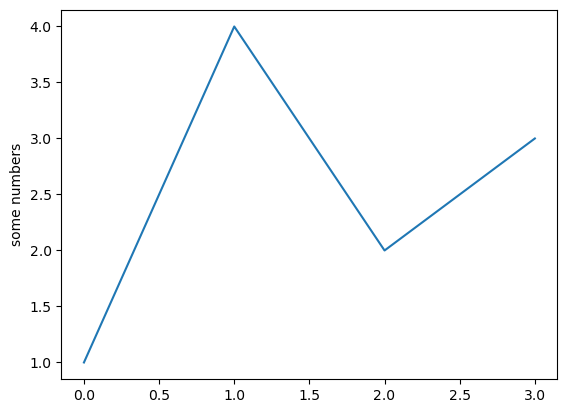

In [6]:
plt.plot([1,4,2,3])
plt.ylabel('some numbers')
plt.show() # optional

**Aside:** In this notebook the examples use the `pyplot` module which by default has a single global `Figure` and associated `Axes` object. This can be convenient but gets confusing if you want to create a whole series of plots. For such more advanced use you would want to do something like:
```python
fig, ax = plt.subplots(figsize=(8, 8))
```
Then replace commands like `plt.plot` with `fig.plot` to crate a plot for this specific figure object. You can get access to the "global" figure object with `plt.gcf()` (get current figure function) and similarly `plt.gca()` gets the axes object.

#### Alternative plot types
As a slightly more complicated example, here is some CSV format data that we parse and plot as points (scatter plot). In this version of the plot command the x and y coordinates are given as separate lists followed by a formatting string "r*" (red asterix symbols)

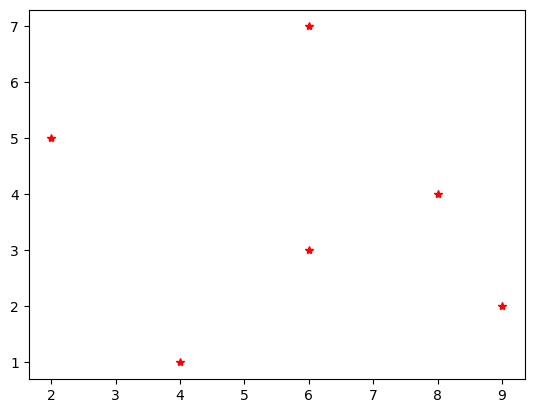

In [7]:
data="""
4,1
2,5
9,2
6,3
6,7
8,4
"""
# crude parsing of CSV data - use csv module for reading csv files
xy = [ [float(i) for i in line.strip().split(",")]
      for line in data.split()]
x = [ pt[0] for pt in xy]
y = [ pt[1] for pt in xy]
plt.plot(x,y,"r*")
plt.show()

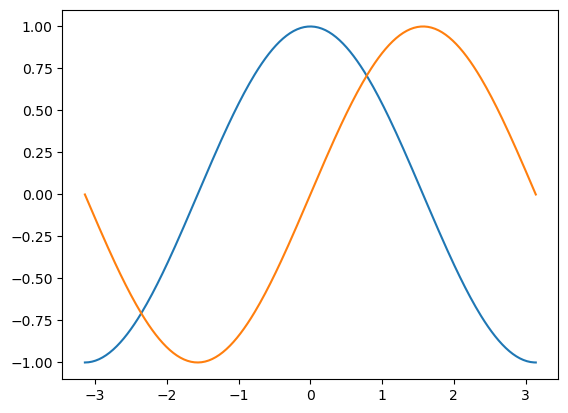

In [8]:
# A slightly more complicated plot with the help of numpy
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)  # create arrays of function values for each X value

plt.plot(X, C)
plt.plot(X, S)

plt.show()

Annotating plots can be done with methods like **text()** to place a label and **annotate()**. For example:

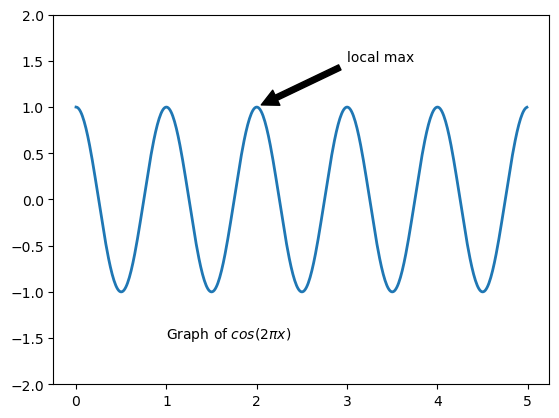

In [9]:
t = np.arange(0.0, 5.0, 0.01)
line, = plt.plot(t, np.cos(2*np.pi*t), lw=2)
plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
# text can include basic LaTeX commands - but need to mark
# string as raw (r"") or escape '\' (by using '\\')
plt.text(1,-1.5,r"Graph of $cos(2\pi x)$") 
plt.ylim(-2,2)
plt.show()

Here is an example of how to create a basic surface contour plot.
    

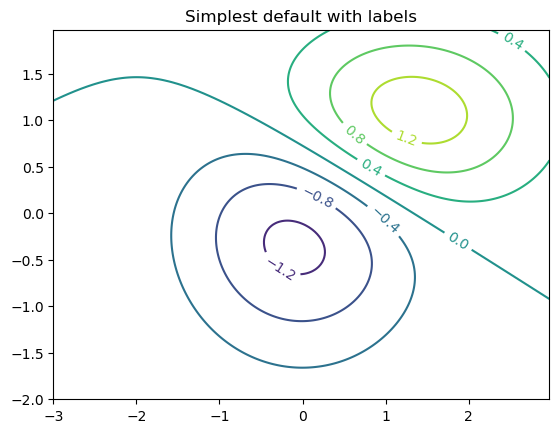

In [10]:
from scipy.stats import * # for multivariate_normal to define our surface
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y) # define mesh of points
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv1 = multivariate_normal([0, 0], [[1.0, 0.0], [0.0, 1.0]])
rv2 = multivariate_normal([1, 1], [[1.5, 0.0], [0.0, 0.5]])
#Z1 = bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
#Z2 = bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z1 = rv1.pdf(pos)
Z2 = rv2.pdf(pos)
Z = 10.0 * (Z2 - Z1) # difference of Gaussians

# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')
plt.show()

#### Saving Plots
If you want to use your plot in a paper or similar there a few differnt options:

1. You can copy and paste the picture out of the browser window if you are using notebooks
2. You can specifically save the picture to a file in a range of formats simply using the `savefig()` method on plots. The format is guessed based on the filename extension


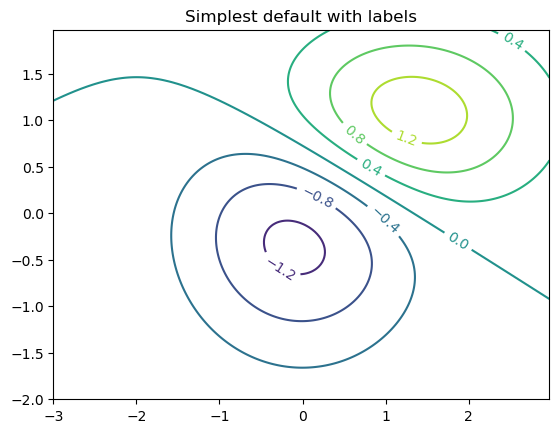

In [11]:
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')
plt.savefig("surface_ex.png")
plt.savefig("surface_ex.pdf")

Look in the directory containing this notebook and you should find 2 files: `surface_ex.png` and `surface_ex.pdf` that you can download.

The complete list of filetypes supported by matplotlib is:

In [12]:
for ext,description in plt.gcf().canvas.get_supported_filetypes().items():
    print("%s: \t%s" % (ext,description))

eps: 	Encapsulated Postscript
jpg: 	Joint Photographic Experts Group
jpeg: 	Joint Photographic Experts Group
pdf: 	Portable Document Format
pgf: 	PGF code for LaTeX
png: 	Portable Network Graphics
ps: 	Postscript
raw: 	Raw RGBA bitmap
rgba: 	Raw RGBA bitmap
svg: 	Scalable Vector Graphics
svgz: 	Scalable Vector Graphics
tif: 	Tagged Image File Format
tiff: 	Tagged Image File Format


<Figure size 640x480 with 0 Axes>